In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



## Create Logistic Regression Data

In [5]:
np.random.seed(2)

# Number of samples per group
n = 40

# Each class from a different normal distribution
class1 = [i for i in np.random.normal(80, 7, n)]
class2 = [i for i in np.random.normal(50, 10, int(n))]

# coerce data to list
x = class1 + class2

# create labels
y = [1] * n + [0] * int(n)
  
# send data to df
df = pd.DataFrame(list(zip(x, y)), columns=['Temperature', 'Weather'])
df.head()

np.mean(df["Temperature"])

63.59827436750984

Text(0.5, 0, 'Temperature (in Degrees Fahrenheit)')

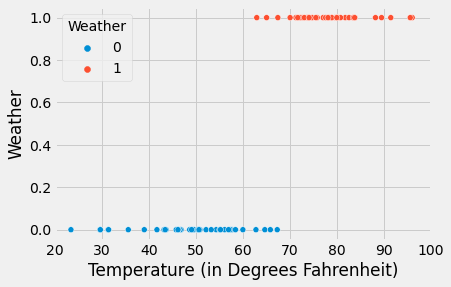

In [12]:
# View scatterplot of data
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="Temperature", y="Weather", hue="Weather")
ax.set_xlim(20, 100)
ax.set_xlabel("Temperature (in Degrees Fahrenheit)")

<AxesSubplot:ylabel='Weather'>

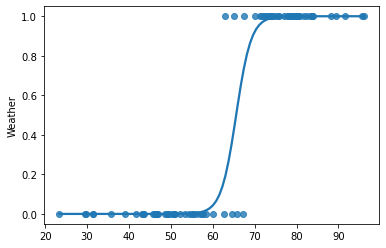

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X = df['Temperature'].values.reshape(-1, 1)
y = df['Weather']

log_reg = LogisticRegression()
log_reg.fit(X, y)

sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)


Coefficient for Temperature:  [[0.51385803]]
Intercept:  [-34.05072568]


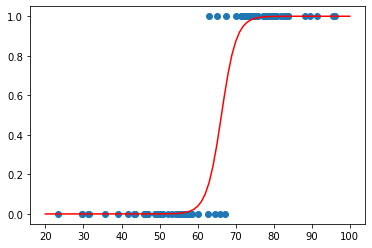

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

X_range = 100
Xs = [i for i in range(20, X_range + 1)]
Ys = [log_reg.predict_proba([[value]])[0][1] for value in range(20, X_range + 1)]

plt.scatter(X, y)
plt.plot(Xs, Ys, color='red')

print("Coefficient for Temperature: ", log_reg.coef_)
print("Intercept: ", log_reg.intercept_)

curve_df = pd.DataFrame({"x": Xs, "y": Ys})

curve_df.to_json('curve_df.json', orient='records')

## Export data for article
- ScatterPlot

In [9]:
df.to_json('scatterData.json', orient='records')

Gradient Descent

In [10]:
class GradientDescentLogisticRegression:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

/var/folders/1n/990hwcxs4rz_1s76p1_2xfkw0000gr/T/ipykernel_82993/3614975627.py:13: RuntimeWarning: invalid value encountered in double_scalars
  m = m - (self.learning_rate * m_gradient)


m nan b inf


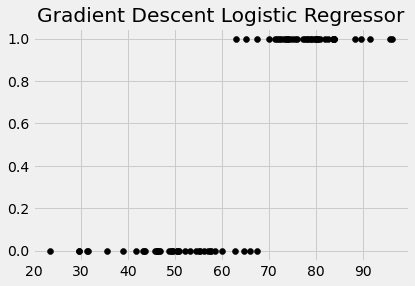

In [15]:
clf = GradientDescentLogisticRegression()
clf.fit(df.Temperature, df.Weather)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(df.Temperature, df.Weather, color='black')
plt.plot(df.Temperature, clf.predict(df.Temperature))
plt.gca().set_title("Gradient Descent Logistic Regressor")
print('m', clf.m, 'b', clf.b)

In [14]:
gdWeight = 0
gdBias = 0
learning_rate = 0.01
N = df.shape[0]
iterations = 1000

In [13]:
for _ in range(1):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
        biasSum = np.sum(biasDifference)
        b_gradient = (-2/N) * biasSum
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
#         print('bias', gdBias)
        
        
        weightDifference = df.sqft * (df.price - (gdWeight * df.sqft + gdBias))
#         print('weightDifference', weightDifference)
        weightSum = np.sum(weightDifference)
#         print('weightSum', weightSum)
        w_gradient = (-2/N) * weightSum
#         print('w_gradient', np.round(w_gradient, 3))
        weight = gdWeight - (learning_rate * w_gradient)
        gdWeight = np.round(weight, 3)
print(gdWeight, gdBias)

NameError: name 'iterations' is not defined

In [ ]:
b_gradient = (-2/N) * biasSum
print(np.round(b_gradient, 3))

In [ ]:
gdBias += learning_rate * b_gradient
print(gdBias)